# Set Up

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
spend = pd.read_csv('AW_AveMonthSpend.csv')
spend

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95
...,...,...
16514,13121,101
16515,26100,46
16516,11328,79
16517,23077,65


In [32]:
bike = pd.read_csv('AW_BikeBuyer.csv')
bike.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [33]:
bike.shape

(16519, 2)

In [34]:
customer = pd.read_csv('AdvWorksCusts.csv')
customer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [35]:
customer.shape

(16519, 23)

# Data Understanding

In [36]:
spend.dtypes

CustomerID       int64
AveMonthSpend    int64
dtype: object

In [37]:
bike.dtypes

CustomerID    int64
BikeBuyer     int64
dtype: object

In [38]:
customer.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [39]:
spend.isna().sum()

CustomerID       0
AveMonthSpend    0
dtype: int64

In [40]:
bike.isna().sum()

CustomerID    0
BikeBuyer     0
dtype: int64

In [41]:
customer.isna().sum()

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

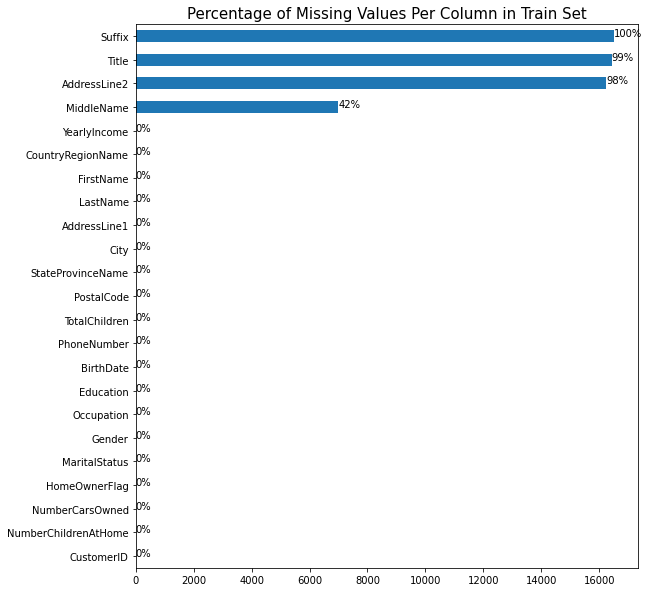

In [42]:
# Check the percantage for missing values in customer set
ax = customer.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/customer.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

the missing columns with missing values seem valid, i.e maybe the customers don't have name suffixes or second address lines.

most customers have not indicated a title and a number seem not to have middle names

In [43]:
#unique elements in our data:
cols = customer.columns.to_list()

for col in cols:
  print('COLUMN:', col)
  print('Number of unique variables:', customer[col].nunique())
  print(customer[col].unique())
  print()

COLUMN: CustomerID
Number of unique variables: 16404
[11000 11001 11002 ... 29480 29481 29482]

COLUMN: Title
Number of unique variables: 5
[nan 'Ms.' 'Mr.' 'Mrs.' 'Sr.' 'Ms']

COLUMN: FirstName
Number of unique variables: 662
['Jon' 'Eugene' 'Ruben' 'Christy' 'Elizabeth' 'Julio' 'Janet' 'Marco'
 'Rob' 'Shannon' 'Jacquelyn' 'Curtis' 'Lauren' 'Ian' 'Sydney' 'Chloe'
 'Wyatt' 'Luke' 'Jordan' 'Seth' 'Russell' 'Alejandro' 'Harold' 'Jessie'
 'Jill' 'Theresa' 'Denise' 'Jaime' 'Ebony' 'Wendy' 'Jennifer' 'Wesley'
 'Jesse' 'Amanda' 'Megan' 'Nathan' 'Adam' 'Leonard' 'Christine' 'Jaclyn'
 'Carol' 'Alan' 'Daniel' 'Heidi' 'Ana' 'Deanna' 'Gilbert' 'Michele' 'Carl'
 'Marc' 'Ashlee' 'Todd' 'Noah' 'Angela' 'Chase' 'Jessica' 'Grace' 'Caleb'
 'Willie' 'Linda' 'Casey' 'Amy' 'Levi' 'Felicia' 'Blake' 'Leah' 'Gina'
 'Donald' 'Damien' 'Savannah' 'Alyssa' 'Emily' 'Ryan' 'Hunter' 'Abigail'
 'Trevor' 'Dalton' 'Aimee' 'Cedric' 'Chad' 'Andrés' 'Edwin' 'Mallory'
 'Latasha' 'Abby' 'Julia' 'Cassie' 'Edgar' 'Candace' '

In [44]:
#checking for duplicates
print(spend.duplicated().any())
print(spend.duplicated().sum())

True
98


In [45]:
print(bike.duplicated().any())
print(bike.duplicated().sum())

True
111


In [46]:
print(customer.duplicated().any())
print(customer.duplicated().sum())

True
98


# Data Cleaning

In [47]:
spend = spend.drop_duplicates()
print(spend.shape)

(16421, 2)


In [48]:
bike = bike.drop_duplicates()
print(bike.shape)

(16408, 2)


In [49]:
customer = customer.drop_duplicates()
print(customer.shape)

(16421, 23)


# EDA

In [50]:
spend.describe()

,CustomerID,AveMonthSpend
count,16421.000000,16421.000000
mean,20237.520370,72.397783
std,5340.379938,27.272844
min,11000.000000,22.000000
25%,15615.000000,52.000000
50%,20228.000000,68.000000
75%,24860.000000,84.000000
max,29482.000000,176.000000


In [51]:
bike.describe()

,CustomerID,BikeBuyer
count,16408.000000,16408.000000
mean,20239.159434,0.332460
std,5340.307448,0.471109
min,11000.000000,0.000000
25%,15616.750000,0.000000
50%,20230.500000,0.000000
75%,24861.250000,1.000000
max,29482.000000,1.000000


In [52]:
customer.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000,16421.000000
mean,20237.520370,0.674198,1.499604,0.991170,2.004750,78139.218501
std,5340.379938,0.468688,1.138819,1.514239,1.682496,39724.552017
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15615.000000,0.000000,1.000000,0.000000,0.000000,47816.000000
50%,20228.000000,1.000000,2.000000,0.000000,2.000000,76134.000000
75%,24860.000000,1.000000,2.000000,2.000000,3.000000,105203.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


Distribution of values in the BIkeBuyer column:

In [53]:
bike['BikeBuyer'].value_counts()

0    10953
1     5455
Name: BikeBuyer, dtype: int64

Ranks the median YearlyIncome by Occupation:

In [54]:
customer[['YearlyIncome', 'Occupation']].groupby('Occupation').median()

,YearlyIncome
Occupation,
Clerical,49480.5
Management,118782.0
Manual,21722.0
Professional,99064.0
Skilled Manual,66436.0


which group of customers accounts for the highest AveMonthSpend values?


In [28]:
#Separating the birth date into year and month
#customer = customer['BirthDate'].apply(lambda x: pd.Series([i for i in reversed(x.lower().split('-'))]))
#customer.columns = ['date', 'month', 'year']
#customer = customer[['year', 'month']]


In [55]:
customer['BirthDate'] = pd.to_datetime(customer['BirthDate'])
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16421 entries, 0 to 16507
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            16421 non-null  int64         
 1   Title                 88 non-null     object        
 2   FirstName             16421 non-null  object        
 3   MiddleName            9461 non-null   object        
 4   LastName              16421 non-null  object        
 5   Suffix                2 non-null      object        
 6   AddressLine1          16421 non-null  object        
 7   AddressLine2          275 non-null    object        
 8   City                  16421 non-null  object        
 9   StateProvinceName     16421 non-null  object        
 10  CountryRegionName     16421 non-null  object        
 11  PostalCode            16421 non-null  object        
 12  PhoneNumber           16421 non-null  object        
 13  BirthDate       

In [56]:
startdt = pd.to_datetime('1998-01-01')
print(startdt)

1998-01-01 00:00:00


In [57]:
def function_2(row):
    return (startdt - row['BirthDate']) / np.timedelta64(1, 'Y')

customer['age'] = customer.apply(lambda row: function_2(row), axis=1)
customer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,31.735080
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,32.635852
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,32.389440
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,29.878779
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,29.399645


In [58]:
customer['age'].describe()

count    16421.000000
mean        35.954354
std         11.245322
min         17.016092
25%         27.291457
50%         34.442870
75%         43.305475
max         87.388516
Name: age, dtype: float64

In [59]:
# performing binning on age
# we bin by defining the intervals and categories
interval = (17, 25, 45, 55, 88)
categories = ['youth', 'mid-adult', 'adult', 'senior']
customer["age"] = pd.cut(customer.age, interval, labels = categories)

In [60]:
customer = customer.merge(spend, how='left', on='CustomerID')
customer

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,mid-adult,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,mid-adult,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,mid-adult,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,mid-adult,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,mid-adult,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16450,29478,NaN,Darren,D,Carlson,NaN,5240 Premier Pl.,NaN,Stoke-on-Trent,England,...,Clerical,M,S,1,0,0,3,45986,mid-adult,65
16451,29479,NaN,Tommy,L,Tang,NaN,"111, rue Maillard",NaN,Versailles,Yveline,...,Clerical,M,M,1,0,0,1,80049,mid-adult,77
16452,29480,NaN,Nina,W,Raji,NaN,9 Katherine Drive,NaN,London,England,...,Clerical,F,S,1,0,0,3,60417,mid-adult,48
16453,29481,NaN,Ivan,NaN,Suri,NaN,Knaackstr 4,NaN,Hof,Bayern,...,Clerical,M,S,0,0,0,3,66653,mid-adult,65


<function matplotlib.pyplot.show>

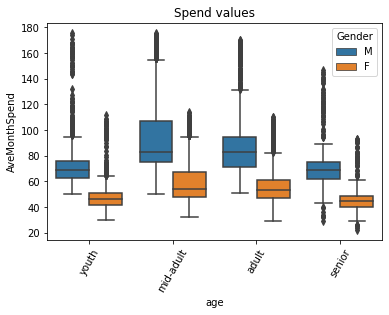

In [61]:
sns.boxplot(y= customer["AveMonthSpend"], x=customer["age"], hue=customer["Gender"])
plt.xticks(rotation=60)
plt.title('Spend values')
plt.show

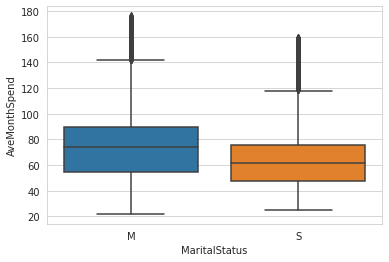

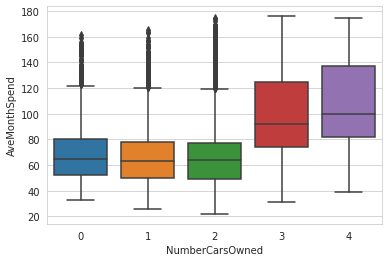

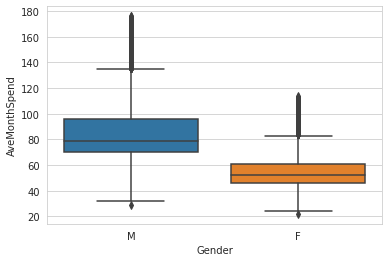

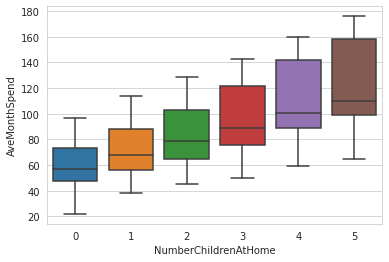

In [62]:
def plot_box(Spending, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=customer)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['MaritalStatus', 'NumberCarsOwned', 'Gender', 'NumberChildrenAtHome']
plot_box(customer, cat_cols) 

In [63]:
customer = customer.merge(bike, how='left', on='CustomerID')
customer

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,M,1,0,0,2,137947,mid-adult,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,M,S,0,1,3,3,101141,mid-adult,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,M,1,1,3,3,91945,mid-adult,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,F,S,0,1,0,0,86688,mid-adult,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,F,S,1,4,5,5,92771,mid-adult,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,29478,NaN,Darren,D,Carlson,NaN,5240 Premier Pl.,NaN,Stoke-on-Trent,England,...,M,S,1,0,0,3,45986,mid-adult,65,0
16467,29479,NaN,Tommy,L,Tang,NaN,"111, rue Maillard",NaN,Versailles,Yveline,...,M,M,1,0,0,1,80049,mid-adult,77,0
16468,29480,NaN,Nina,W,Raji,NaN,9 Katherine Drive,NaN,London,England,...,F,S,1,0,0,3,60417,mid-adult,48,1
16469,29481,NaN,Ivan,NaN,Suri,NaN,Knaackstr 4,NaN,Hof,Bayern,...,M,S,0,0,0,3,66653,mid-adult,65,0


<function matplotlib.pyplot.show>

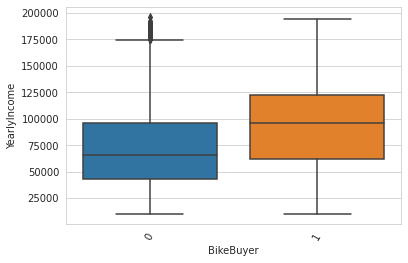

In [64]:
sns.boxplot(y= customer["YearlyIncome"], x=customer["BikeBuyer"])
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show>

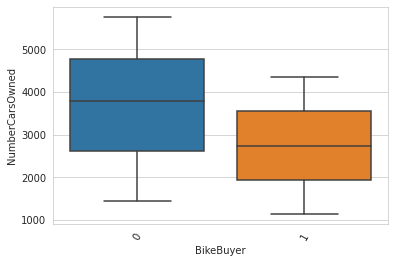

In [65]:
sns.boxplot(y= customer["NumberCarsOwned"].value_counts(), x=customer["BikeBuyer"])
plt.xticks(rotation=60)
plt.show

In [ ]:
#def plot_box(Spending, cols, col_y = 'BikeBuyer'):
 #   for col in cols:
  #      sns.set_style("whitegrid")
   #     #sns.boxplot(col, col_y, data=customer)
    #    plt.xlabel(col) # Set text for the x axis
     #   plt.ylabel(col_y)# Set text for y axis
      #  plt.show()
        
#cat_cols = ['Occupation','Gender', 'MaritalStatus']
#plot_box(customer, cat_cols) 

In [ ]:
# Fill in missing values
# For cat cols and date cols fill in with mode
#for col in all_data.columns:
 # if col in cat_cols:
  #  all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  #elif col in num_cols:
    #all_data[col] = all_data[col].fillna(all_data[col].mean()[0])

# Confirm that there aren't any missing values
#all_data[all_data.columns.difference(['target'])].isna().sum().any()

# Data Preparation

In [67]:
tr = customer.drop(['AveMonthSpend'], axis =1)
tr.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,mid-adult,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,mid-adult,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,mid-adult,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,mid-adult,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,mid-adult,1


In [68]:
test = pd.read_csv('AW_test.csv')
test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [69]:
test.shape

(500, 23)

In [70]:
test['BirthDate'] = pd.to_datetime(test['BirthDate'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            500 non-null    int64         
 1   Title                 4 non-null      object        
 2   FirstName             500 non-null    object        
 3   MiddleName            284 non-null    object        
 4   LastName              500 non-null    object        
 5   Suffix                1 non-null      object        
 6   AddressLine1          500 non-null    object        
 7   AddressLine2          13 non-null     object        
 8   City                  500 non-null    object        
 9   StateProvinceName     500 non-null    object        
 10  CountryRegionName     500 non-null    object        
 11  PostalCode            500 non-null    object        
 12  PhoneNumber           500 non-null    object        
 13  BirthDate           

In [71]:
startdt = pd.to_datetime('1998-01-01')
print(startdt)

1998-01-01 00:00:00


In [72]:
def function_2(row):
    return (startdt - row['BirthDate']) / np.timedelta64(1, 'Y')

test['age'] = customer.apply(lambda row: function_2(row), axis=1)
test.head()


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,Bachelors,Management,F,S,0,2,0,5,86931,31.735080
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,32.635852
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,Graduate Degree,Management,F,M,1,2,0,4,103985,32.389440
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,29.878779
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,High School,Manual,F,M,1,1,2,2,21876,29.399645


In [73]:
# performing binning on age
# we bin by defining the intervals and categories
interval = (17, 25, 45, 55, 88)
categories = ['youth', 'mid-adult', 'adult', 'senior']
test["age"] = pd.cut(test.age, interval, labels = categories)

Using a combination of test and train to make things faster;;

In [74]:
# Combine train and test set
ntr = tr.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((tr, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (16971, 25)


In [75]:
all_data = all_data.drop(['Title','Suffix','AddressLine2' ,'MiddleName', 'BirthDate', 'CustomerID', 'Gender'], axis =1)

In [76]:
all_data.shape

(16971, 18)

In [77]:
all_data.head()

,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age,BikeBuyer
0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,Bachelors,Professional,M,1,0,0,2,137947,mid-adult,0.0
1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,Bachelors,Professional,S,0,1,3,3,101141,mid-adult,1.0
2,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,Bachelors,Professional,M,1,1,3,3,91945,mid-adult,0.0
3,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,Bachelors,Professional,S,0,1,0,0,86688,mid-adult,0.0
4,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,Bachelors,Professional,S,1,4,5,5,92771,mid-adult,1.0


In [78]:
#merging name columns;
all_data['name']= all_data['FirstName'] + ' ' + all_data['LastName']

since the name is a unique identifier, we'll drop it

In [80]:
all_data = all_data.drop(['FirstName', 'LastName', 'name', 'AddressLine1', 'PhoneNumber',], axis =1)

In [81]:
all_data.shape

(16971, 14)

In [82]:
all_data.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age,BikeBuyer
0,Rockhampton,Queensland,Australia,4700,Bachelors,Professional,M,1,0,0,2,137947,mid-adult,0.0
1,Seaford,Victoria,Australia,3198,Bachelors,Professional,S,0,1,3,3,101141,mid-adult,1.0
2,Hobart,Tasmania,Australia,7001,Bachelors,Professional,M,1,1,3,3,91945,mid-adult,0.0
3,North Ryde,New South Wales,Australia,2113,Bachelors,Professional,S,0,1,0,0,86688,mid-adult,0.0
4,Wollongong,New South Wales,Australia,2500,Bachelors,Professional,S,1,4,5,5,92771,mid-adult,1.0


In [83]:
# Category columns
cat_cols = ['MaritalStatus', 'Education', 'Occupation','age', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode','HomeOwnerFlag' ] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['TotalChildren', 'NumberChildrenAtHome','NumberCarsOwned', 'YearlyIncome']

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16971 entries, 0 to 16970
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  16971 non-null  category
 1   StateProvinceName     16971 non-null  category
 2   CountryRegionName     16971 non-null  category
 3   PostalCode            16971 non-null  category
 4   Education             16971 non-null  category
 5   Occupation            16971 non-null  category
 6   MaritalStatus         16971 non-null  category
 7   HomeOwnerFlag         16971 non-null  category
 8   NumberCarsOwned       16971 non-null  int64   
 9   NumberChildrenAtHome  16971 non-null  int64   
 10  TotalChildren         16971 non-null  int64   
 11  YearlyIncome          16971 non-null  int64   
 12  age                   16971 non-null  category
 13  BikeBuyer             16471 non-null  float64 
dtypes: category(9), float64(1), int64(4)
memory usage: 869

In [84]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,...,PostalCode_W1Y 3RA,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1
0,0,0,2,137947,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,3,101141,1.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,3,3,91945,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,86688,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,5,92771,1.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


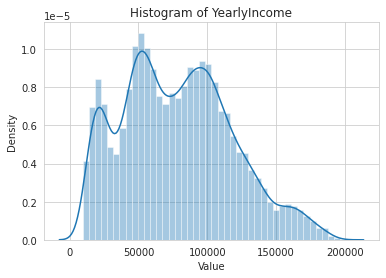

In [85]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(all_data['YearlyIncome'], 'YearlyIncome')

In [86]:
all_data['YearlyIncome'].skew()

0.3558568228293505

In [88]:
# Separate train and test data from the combined dataframe
train = all_data[:ntr]
test = all_data[ntr:]

# Check the shapes of the split dataset
train.shape, test.shape

((16471, 679), (500, 679))

In [89]:
#to be used for the regression modelling;
train2 = train
test2 = test

In [91]:
train2.head()

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,...,PostalCode_W1Y 3RA,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1
0,0,0,2,137947,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,3,101141,1.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,3,3,91945,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,86688,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,5,92771,1.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
customer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,age,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,M,1,0,0,2,137947,mid-adult,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,M,S,0,1,3,3,101141,mid-adult,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,M,1,1,3,3,91945,mid-adult,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,F,S,0,1,0,0,86688,mid-adult,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,F,S,1,4,5,5,92771,mid-adult,95,1


In [92]:
test2.head()

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,...,PostalCode_W1Y 3RA,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1
16471,2,0,5,86931,NaN,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16472,2,2,4,100125,NaN,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16473,2,0,4,103985,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16474,0,0,4,127161,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16475,1,2,2,21876,NaN,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [93]:
test[:2]

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,...,PostalCode_W1Y 3RA,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1
16471,2,0,5,86931,NaN,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16472,2,2,4,100125,NaN,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
test = test.drop('BikeBuyer', axis = 1)

In [95]:
test.shape

(500, 678)

# Modelling

In [ ]:
!pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['BikeBuyer'])
X = train[main_cols]
y = train.BikeBuyer.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [ ]:
# creating a balanced dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
# we check the amount of records in each category
np.bincount(y_train)

array([7698, 3831])

## Models

In [ ]:
import lightgbm as lgb

In [ ]:
#import classifier algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from catboost import CatBoostClassifier

# create models
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
gbm_model = GradientBoostingClassifier()
xg_model = XGBClassifier()
lgbm_model = LGBMClassifier()
ada_model = AdaBoostClassifier()
bag_model = BaggingClassifier()
dtr_model = DecisionTreeClassifier()
svr_model = SVR()
ctb_model = CatBoostClassifier()

#training the models
lg_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)
kn_model.fit(X_train,y_train)
et_model.fit(X_train,y_train)
gbm_model.fit(X_train, y_train)
xg_model.fit(X_train,y_train)
lgbm_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
bag_model.fit(X_train, y_train)
dtr_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
ctb_model.fit(X_train, y_train)

Learning rate set to 0.029263
0:	learn: 0.6784731	total: 54.5ms	remaining: 54.4s
1:	learn: 0.6631311	total: 60.4ms	remaining: 30.1s
2:	learn: 0.6497102	total: 65.7ms	remaining: 21.9s
3:	learn: 0.6363670	total: 71.8ms	remaining: 17.9s
4:	learn: 0.6244481	total: 77.5ms	remaining: 15.4s
5:	learn: 0.6143418	total: 83.5ms	remaining: 13.8s
6:	learn: 0.6045957	total: 89.2ms	remaining: 12.6s
7:	learn: 0.5948396	total: 95.3ms	remaining: 11.8s
8:	learn: 0.5863054	total: 102ms	remaining: 11.2s
9:	learn: 0.5775512	total: 108ms	remaining: 10.7s
10:	learn: 0.5692076	total: 114ms	remaining: 10.3s
11:	learn: 0.5619702	total: 121ms	remaining: 9.96s
12:	learn: 0.5561460	total: 127ms	remaining: 9.63s
13:	learn: 0.5501384	total: 133ms	remaining: 9.39s
14:	learn: 0.5436777	total: 139ms	remaining: 9.15s
15:	learn: 0.5381616	total: 146ms	remaining: 8.95s
16:	learn: 0.5334597	total: 152ms	remaining: 8.76s
17:	learn: 0.5299948	total: 158ms	remaining: 8.59s
18:	learn: 0.5261084	total: 162ms	remaining: 8.34s
19:

In [ ]:
#making predictions
lg_y_pred = lg_model.predict_proba(X_test)[:, 1]
rf_y_pred = rf_model.predict_proba(X_test)[:, 1]
kn_y_pred = kn_model.predict_proba(X_test)[:, 1]
et_y_pred = et_model.predict_proba(X_test)[:, 1]
gbm_y_pred = gbm_model.predict_proba(X_test)[:, 1]
xg_y_pred = xg_model.predict_proba(X_test)[:, 1]
lgbm_y_pred = lgbm_model.predict_proba(X_test)[:, 1]
ada_y_pred = ada_model.predict_proba(X_test)[:, 1]
bag_y_pred = bag_model.predict_proba(X_test)[:, 1]
dtr_y_pred = dtr_model.predict_proba(X_test)[:, 1]
#svr_y_pred = svr_model.predict(X_test)[:, 1]
ctb_y_pred = ctb_model.predict_proba(X_test)[:, 1]

In [ ]:
rf_y_pred

array([0.16, 0.27, 0.91, ..., 0.89, 0.74, 0.13])

## Evaluation

The error metric for this competition is the R2

more model:

In [ ]:
##Evaluation of the Classifier models
from sklearn.metrics import mean_squared_error

# The `squared=False` bit tells this function to return the ROOT mean squared error
print('RandomForestclassifier: ', mean_squared_error(y_test, rf_model.predict(X_test), squared=False))
print('KNeighborsclassifier: ', mean_squared_error(y_test, kn_model.predict(X_test), squared=False))
print('DecisionTreeclassifier: ', mean_squared_error(y_test, dtr_model.predict(X_test), squared=False))
print('SVR: ', mean_squared_error(y_test, svr_model.predict(X_test), squared=False))
print('XGBclassifier: ', mean_squared_error(y_test, xg_model.predict(X_test), squared=False))
print('CatBoostclassifier: ', mean_squared_error(y_test, ctb_model.predict(X_test), squared=False))
print('GradientBoostingclassifier: ', mean_squared_error(y_test, gbm_model.predict(X_test), squared=False))
print('AdaBoostclassifier: ', mean_squared_error(y_test, ada_model.predict(X_test), squared=False))
print('Baggingclassifier: ', mean_squared_error(y_test, bag_model.predict(X_test), squared=False))
print('LGBMclassifier: ', mean_squared_error(y_test, lgbm_model.predict(X_test), squared=False))
print('Extratreeclassifier: ', mean_squared_error(y_test, et_model.predict(X_test), squared=False))
print('Logisticclassifier: ', mean_squared_error(y_test, lg_model.predict(X_test), squared=False))

RandomForestclassifier:  0.4937898435071231
KNeighborsclassifier:  0.5926843911690359
DecisionTreeclassifier:  0.5288136428639075
SVR:  0.48886884602572556
XGBclassifier:  0.4681261024061207
CatBoostclassifier:  0.4711421324226347
GradientBoostingclassifier:  0.46726080387998936
AdaBoostclassifier:  0.4717859160967784
Baggingclassifier:  0.4871891811810006
LGBMclassifier:  0.4720003155243854
Extratreeclassifier:  0.5095208467987757
Logisticclassifier:  0.5764149096945452


In [ ]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

## Increasing Model Perfomance

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Optimize model paramaters 
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3,5]
        }
my_xg_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xg_model.fit(X_train, y_train)
print(my_xg_model.best_params_)

In [ ]:
# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=1.0, max_depth=5)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Get error rate
print("New XGB classifier: ", mean_squared_error(y_test, lg_model.predict(X_test), squared=False))

# Neural Networks

In [ ]:
# importing libraries
import keras
from keras.models import Sequential     # Used to initialize the Artificial Neural Network
from keras.layers import Dense          # Used to build the hidden Layers
from keras.layers import Dropout        # Used to prevent overfitting

# creating an instance 
classifier = Sequential() 

# adding hidden layers
classifier.add(Dense(units = 100, input_dim = 259, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 100, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))

# output layer
classifier.add(Dense(units = 1, activation = "sigmoid"))

# compiling our model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training our model
classifier.fit(X_train, y_train, epochs = 500, batch_size = 259)

Epoch 1/500
284/284 [==============================] - 2s 4ms/step - loss: 0.5958 - accuracy: 0.6690
Epoch 2/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5462 - accuracy: 0.7187
Epoch 3/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5420 - accuracy: 0.7237
Epoch 4/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5347 - accuracy: 0.7276
Epoch 5/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5342 - accuracy: 0.7296
Epoch 6/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5306 - accuracy: 0.7317
Epoch 7/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5256 - accuracy: 0.7349
Epoch 8/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5245 - accuracy: 0.7368
Epoch 9/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5242 - accuracy: 0.7367
Epoch 10/500
284/284 [==============================] - 1s 4ms/step - loss: 0.5192 - accura

## model evaluation

In [ ]:
loss, accuracy = classifier.evaluate(X_test, y_test)
print('ANN Accuracy:', accuracy)

984/984 [==============================] - 1s 996us/step - loss: 0.7269 - accuracy: 0.7068
ANN Accuracy: 0.706843376159668


In [ ]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# evaluate the model
# roc_auc_score
print("NN: ", roc_auc_score(y_test, lg_y_pred))

# REGRESSION MODELLING;;

In [113]:
train2.shape

(16471, 679)

In [114]:
customer.shape

(16471, 26)

In [115]:
remove_cols = customer.columns.difference(['CustomerID', 'AveMonthSpend'])
cust = customer.drop(remove_cols, axis=1)
cust[:2]

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117


In [116]:
train3 = pd.concat([train2, cust], axis=1)
train3

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,...,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1,CustomerID,AveMonthSpend
0,0,0,2,137947,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,11000,89
1,1,3,3,101141,1.0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,11001,117
2,1,3,3,91945,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,11002,123
3,1,0,0,86688,0.0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,11003,50
4,4,5,5,92771,1.0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,11004,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,0,0,3,45986,0.0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,29478,65
16467,0,0,1,80049,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,29479,77
16468,0,0,3,60417,1.0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,29480,48
16469,0,0,3,66653,0.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,29481,65


In [117]:
train3 = train3.drop(['CustomerID', 'BikeBuyer'], axis=1)
train3

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,...,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1,AveMonthSpend
0,0,0,2,137947,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,89
1,1,3,3,101141,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,117
2,1,3,3,91945,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,123
3,1,0,0,86688,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,50
4,4,5,5,92771,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,0,0,3,45986,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,65
16467,0,0,1,80049,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,77
16468,0,0,3,60417,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,48
16469,0,0,3,66653,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,65


In [106]:
test[:2]

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,...,PostalCode_W1Y 3RA,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1
16471,2,0,5,86931,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16472,2,2,4,100125,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
# Select main columns to be used in training
main_cols = train3.columns.difference(['AveMonthSpend'])
X = train3[main_cols]
y = train3.AveMonthSpend.astype(int)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# creating a balanced dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [ ]:
# we check the amount of records in each category
np.bincount(y_train)

In [125]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor 
import lightgbm as lgb

In [127]:
#Creating model2
rnfreg2_model = RandomForestRegressor()
linearreg2_model = LinearRegression()
knnreg2_model = KNeighborsRegressor()
dtreg2_model = DecisionTreeRegressor()
svrreg_model = SVR()
xgbreg2_model = XGBRegressor()
ctb_model = CatBoostRegressor()
gbreg_model = GradientBoostingRegressor()
abreg_model = AdaBoostRegressor()
breg_model = BaggingRegressor()
lgbm = lgb.LGBMRegressor()

#training model
rnfreg2_model.fit(X_train, y_train) 
linearreg2_model.fit(X_train, y_train)
knnreg2_model.fit(X_train, y_train)
dtreg2_model.fit(X_train, y_train)
svrreg_model.fit(X_train, y_train)
xgbreg2_model.fit(X_train, y_train) 
ctb_model.fit(X_train, y_train) 
gbreg_model.fit(X_train, y_train) 
abreg_model.fit(X_train, y_train) 
breg_model.fit(X_train, y_train) 
lgbm.fit(X_train, y_train) 

[18:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.060248
0:	learn: 26.3473254	total: 55ms	remaining: 55s
1:	learn: 25.3601523	total: 60.7ms	remaining: 30.3s
2:	learn: 24.4634159	total: 65.4ms	remaining: 21.7s
3:	learn: 23.6199628	total: 70.2ms	remaining: 17.5s
4:	learn: 22.8505631	total: 75.1ms	remaining: 14.9s
5:	learn: 22.1389467	total: 80ms	remaining: 13.2s
6:	learn: 21.5044255	total: 85.1ms	remaining: 12.1s
7:	learn: 20.9239185	total: 90.1ms	remaining: 11.2s
8:	learn: 20.3702032	total: 95.1ms	remaining: 10.5s
9:	learn: 19.8521724	total: 101ms	remaining: 10s
10:	learn: 19.3703893	total: 106ms	remaining: 9.56s
11:	learn: 18.9500025	total: 111ms	remaining: 9.18s
12:	learn: 18.5434974	total: 116ms	remaining: 8.84s
13:	learn: 18.1905163	total: 121ms	remaining: 8.55s
14:	learn: 17.8596715	total: 126ms	remaining: 8.29s
15:	learn: 17.5638738	total: 132ms	remaining: 8.11s
16:	learn: 17.276110

LGBMRegressor()

In [128]:
from sklearn.metrics import mean_squared_error

# The `squared=False` bit tells this function to return the ROOT mean squared error
print('RandomForestRegressor: ', mean_squared_error(y_test, rnfreg2_model.predict(X_test), squared=False))
print('LinearRegression: ', mean_squared_error(y_test, linearreg2_model.predict(X_test), squared=False))
print('KNeighborsRegressor: ', mean_squared_error(y_test, knnreg2_model.predict(X_test), squared=False))
print('DecisionTreeRegressor: ', mean_squared_error(y_test, dtreg2_model.predict(X_test), squared=False))
print('SVR: ', mean_squared_error(y_test, svrreg_model.predict(X_test), squared=False))
print('XGBRegressor: ', mean_squared_error(y_test, xgbreg2_model.predict(X_test), squared=False))
print('CatBoostRegressor: ', mean_squared_error(y_test, ctb_model.predict(X_test), squared=False))
print('GradientBoostingRegressor: ', mean_squared_error(y_test, gbreg_model.predict(X_test), squared=False))
print('AdaBoostRegressor: ', mean_squared_error(y_test, abreg_model.predict(X_test), squared=False))
print('BaggingRegressor: ', mean_squared_error(y_test, breg_model.predict(X_test), squared=False))
print('LGBMRegressor: ', mean_squared_error(y_test, lgbm.predict(X_test), squared=False))

RandomForestRegressor:  12.584153941653208
LinearRegression:  35575.1205455125
KNeighborsRegressor:  22.43642684779551
DecisionTreeRegressor:  16.701186765385085
SVR:  20.811880295518822
XGBRegressor:  13.489649598407329
CatBoostRegressor:  12.449507191726868
GradientBoostingRegressor:  13.49984279507622
AdaBoostRegressor:  15.697446900219738
BaggingRegressor:  13.003314639118004
LGBMRegressor:  12.331733981062383


##model tuning

a)random forest

In [ ]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_squared_error(y_test, model.predict(X_test), squared=False))

In [ ]:
b) xgb

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()

# Define hyperparameters
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 10, 15],
              'min_child_weight': [4, 8, 12],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

# Grid search object
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

# Submission

In [ ]:
tst = pd.read_csv('AW_test.csv')
tst.head[:2]

In [136]:
col_titles = ('ID', 'AveMonthSpend')
dt = tst['CustomerID']
pd.DataFrame(dt, columns=col_titles).to_csv('sub.csv', index=False)

### Regression::

In [129]:
test2.head()

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,...,PostalCode_W1Y 3RA,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1
16471,2,0,5,86931,NaN,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16472,2,2,4,100125,NaN,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16473,2,0,4,103985,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16474,0,0,4,127161,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16475,1,2,2,21876,NaN,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [132]:
test2 = test2.drop(['BikeBuyer'], axis = 1)
test2[:2]

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,MaritalStatus_M,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,...,PostalCode_W1Y 3RA,PostalCode_WA1,PostalCode_WA1 4SY,PostalCode_WA3,PostalCode_WA3 7BH,PostalCode_Y024 1GF,PostalCode_Y03 4TN,PostalCode_YO15,HomeOwnerFlag_0,HomeOwnerFlag_1
16471,2,0,5,86931,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16472,2,2,4,100125,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
# Get the predicted result for the test Data with the model of choice
prediction = lgbm.predict(test2)

In [ ]:
prediction

In [137]:
sub2 = pd.read_csv('sub.csv')
sub2.head()

,ID,AveMonthSpend


In [139]:
sub2.ID = tst['CustomerID']

In [141]:
sub2.AveMonthSpend = prediction

In [142]:
sub2.head()

,ID,AveMonthSpend
0,18988,40.322564
1,29135,47.193240
2,12156,45.728262
3,13749,45.728262
4,27780,46.200709


In [143]:
sub2.to_csv('lgbmFINAL2.csv', index = False)
sub2.head()

,ID,AveMonthSpend
0,18988,40.322564
1,29135,47.193240
2,12156,45.728262
3,13749,45.728262
4,27780,46.200709


###Classifier

Making submision file:

In [ ]:
test.shape

(500, 678)

In [ ]:
test

In [ ]:
# # Create a submission file
# Make prediction on the test set
predictions = gbm_model.predict(test)

In [ ]:
predictions

In [ ]:
sub.ID = tst['CustomerID']

In [ ]:
sub.BikeBuyer = predictions

In [ ]:
sub.head()

,ID,BikeBuyer
0,18988,0
1,29135,0
2,12156,0
3,13749,0
4,27780,0


In [ ]:
sub.to_csv('gbmFINAL.csv', index = False)
sub.head()

,ID,BikeBuyer
0,18988,0
1,29135,0
2,12156,0
3,13749,0
4,27780,0
